<div style="text-align: center;">
  <img src="https://github.com/Hack-io-Data/Imagenes/blob/main/01-LogosHackio/logo_naranja@4x.png?raw=true" alt="esquema" />
</div>


# Laboratorio EDA y Gestión de Nulos

AutoRenew, una empresa líder en la venta de coches de segunda mano, te ha contratado para desarrollar un modelo predictivo que estime el precio de los vehículos usados. Este modelo ayudará a la empresa a mejorar sus estrategias de ventas, marketing y optimización del inventario. Para ello, cuentas con un conjunto de datos que contiene información detallada sobre diversas características de los coches usados. Sin embargo, como es común en conjuntos de datos reales, encontrarás valores nulos y necesitarás realizar un análisis exploratorio para identificar patrones, correlaciones y posibles anomalías.

 En este laboratorio, tu tarea es realizar un análisis exploratorio de los datos (EDA) y gestionar los valores nulos que encuentres. Este es solo el primer paso de un proyecto que se desarrollará durante toda la semana, en el que usarás este mismo conjunto de datos para practicar diferentes fases del preprocesamiento.

**Columnas del conjunto de datos:**

- **dateCrawled**: Fecha y hora en que se recolectaron los datos del coche.

- **name**: Nombre del anuncio, generalmente incluye la marca y el modelo del coche.

- **seller**: Tipo de vendedor (particular o concesionario).

- **offerType**: Tipo de oferta (venta o subasta).

- **price**: Precio del coche en la moneda local.

- **abtest**: Campo utilizado para pruebas A/B, indicando diferentes versiones del sitio web o anuncio.

- **vehicleType**: Tipo de vehículo (sedán, SUV, hatchback, etc.).

- **yearOfRegistration**: Año de registro del coche.

- **gearbox**: Tipo de caja de cambios (manual o automática).

- **powerCV**: Potencia del coche en caballos de vapor (CV).

- **model**: Modelo específico del coche.

- **kilometer**: Kilometraje total del coche.

- **monthOfRegistration**: Mes de registro del coche.

- **fuelType**: Tipo de combustible (gasolina, diésel, eléctrico, etc.).

- **brand**: Marca del coche.

- **notRepairedDamage**: Indica si el coche tiene daños no reparados.

- **dateCreated**: Fecha de creación del anuncio.

- **nrOfPictures**: Número de fotos en el anuncio.

- **postalCode**: Código postal de la ubicación del coche.

- **lastSeen**: Última fecha y hora en que el anuncio fue visto.

**Instrucciones:**

1. **Análisis Exploratorio de Datos (EDA):** Explora el conjunto de datos para familiarizarte con las diferentes características de los coches. Utiliza gráficos y estadísticas descriptivas para identificar patrones, tendencias y posibles anomalías.
   
2. **Gestión de Valores Nulos:** Identifica las columnas que contienen valores nulos y aplica las técnicas adecuadas para manejarlos. Esto podría incluir la imputación de valores, eliminación de filas o columnas, o cualquier otra estrategia que consideres apropiada.

**Nota:** Este laboratorio es el primer paso de una serie de actividades que realizarás esta semana utilizando el mismo conjunto de datos. Asegúrate de documentar bien tu trabajo, ya que lo utilizarás como base para los siguientes ejercicios.


__________________________________________________________

## **Análisis Exploratorio de Datos (EDA)**

In [68]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd

# Otros objetivos
# -----------------------------------------------------------------------
import math

# Gráficos
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer
from sklearn.ensemble import RandomForestRegressor

import sys
import os
import warnings
warnings.filterwarnings('ignore')

sys.path.append(os.path.abspath('../'))
from src import funciones_soporte as fs

In [69]:
df = pd.read_csv("../datos/autorenew.csv")
df.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerCV,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,private,offer,480,test,NaN,1993,manually,0.0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,private,offer,18300,test,coupe,2011,manually,187.0,NaN,125000,5,diesel,audi,yes,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",private,offer,9800,test,suv,2004,automatic,161.0,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,private,offer,1500,test,small car,2001,manually,74.0,golf,150000,6,petrol,volkswagen,no,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,private,offer,3600,test,small car,2008,manually,68.0,fabia,90000,7,diesel,skoda,no,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [70]:
fs.exploracion_dataframe(df)

El número de datos es 371528 y el de columnas es 20

 ..................... 

Los duplicados que tenemos en el conjunto de datos son: 4

 ..................... 

Los nulos que tenemos en el conjunto de datos son:


,%_nulos
vehicleType,36.003478
gearbox,5.439429
model,5.513447
fuelType,8.986133
notRepairedDamage,19.395577



 ..................... 

Los tipos de las columnas son:


,tipo_dato
dateCrawled,object
name,object
seller,object
offerType,object
price,int64
abtest,object
vehicleType,object
yearOfRegistration,int64
gearbox,object
powerCV,float64



 ..................... 



,count,mean,std,min,25%,50%,75%,max
price,371528.0,17295.141865,3.587954e+06,0.0,1150.0,2950.0,7200.0,2.147484e+09
yearOfRegistration,371528.0,2004.577997,9.286660e+01,1000.0,1999.0,2003.0,2008.0,9.999000e+03
powerCV,371528.0,113.967833,1.895166e+02,0.0,69.0,104.0,148.0,1.972600e+04
kilometer,371528.0,125618.688228,4.011234e+04,5000.0,125000.0,150000.0,150000.0,1.500000e+05
monthOfRegistration,371528.0,5.734445,3.712412e+00,0.0,3.0,6.0,9.0,1.200000e+01
nrOfPictures,371528.0,0.000000,0.000000e+00,0.0,0.0,0.0,0.0,0.000000e+00
postalCode,371528.0,50820.667640,2.579908e+04,1067.0,30459.0,49610.0,71546.0,9.999800e+04



 ..................... 

Los valores que tenemos para las columnas categóricas son: 
La columna DATECRAWLED tiene las siguientes valore únicos:


,count
dateCrawled,
2016-03-24 14:49:47,7
2016-03-26 22:57:31,6
2016-03-19 21:49:56,6
2016-03-22 10:42:10,5
2016-04-04 22:38:11,5


La columna NAME tiene las siguientes valore únicos:


,count
name,
Ford_Fiesta,657
BMW_318i,627
Opel_Corsa,622
Volkswagen_Golf_1.4,603
BMW_316i,523


La columna SELLER tiene las siguientes valore únicos:


,count
seller,
private,371525
commercial,3


La columna OFFERTYPE tiene las siguientes valore únicos:


,count
offerType,
offer,371516
request,12


La columna ABTEST tiene las siguientes valore únicos:


,count
abtest,
test,192585
control,178943


La columna VEHICLETYPE tiene las siguientes valore únicos:


,count
vehicleType,
small car,80023
combi,67564
bus,30201
convertible,22898
coupe,19015


La columna GEARBOX tiene las siguientes valore únicos:


,count
gearbox,
manually,274214
automatic,77105


La columna MODEL tiene las siguientes valore únicos:


,count
model,
golf,30070
andere,26400
3er,20567
polo,13092
corsa,12573


La columna FUELTYPE tiene las siguientes valore únicos:


,count
fuelType,
petrol,223857
diesel,107746
lpg,5378
cng,571
hybrid,278


La columna BRAND tiene las siguientes valore únicos:


,count
brand,
volkswagen,79640
bmw,40274
opel,40136
mercedes_benz,35309
audi,32873


La columna NOTREPAIREDDAMAGE tiene las siguientes valore únicos:


,count
notRepairedDamage,
no,263182
yes,36286


La columna DATECREATED tiene las siguientes valore únicos:


,count
dateCreated,
2016-04-03 00:00:00,14450
2016-04-04 00:00:00,14022
2016-03-20 00:00:00,13547
2016-03-12 00:00:00,13379
2016-03-21 00:00:00,13305


La columna LASTSEEN tiene las siguientes valore únicos:


,count
lastSeen,
2016-04-06 13:45:54,17
2016-04-07 06:45:59,17
2016-04-07 08:16:54,16
2016-04-06 09:46:00,16
2016-04-06 04:17:20,16


Primeras conclusiones:

- Duplicados: Tenemos 4 duplicados que hay que gestionar.
- Nulos: Hay 5 columnas con nulos, entre ellas vehicleType	con un 36% y notRepairedDamage con 19.4%
- Tipo de datos: el monthOfRegistration hay que pasarlo a tipo object, dateCreated pasarlo a datetime y asi no entra dentro de las categoricas, lo mismo para last seen y dateCrawled. Habra que cambiar el año y codigo postal también a categorica.
- Describe: la media y mediana de price distan muchísimo lo que indica que hay bastante valores atípicos por arriba. Como number of pictures es seimpre 0 nos podemos quitar esta columna. Además, no tiene sentido que el precio de un coche sea 0, vamos a eliminar estas filas y comprobar también otros valores que puedan ser erróneos. También podemos ver que hay coches que tienen 0 caballos y otros que tienen más de 2000 cabalos lo cual no existe, por lo que hay que gestionar los valores de esta columna también. Podemos observar también que el año de registro minimo es 1000 y muchos mayores a 2024 lo cual no tiene sentido.


In [71]:
# Eliminamos el duplicado y reseteamos el index
df.drop_duplicates(inplace=True)
df.reset_index(drop=True, inplace=True)

# Gestionamos las fechas
df.loc[df["yearOfRegistration"] < 1886, "yearOfRegistration"] = np.nan
df.loc[df["yearOfRegistration"] > 2024, "yearOfRegistration"] = np.nan
df['tipo_coche'] = df['yearOfRegistration'].apply(fs.clasificar_tipo_coche)

# Cambiamos los meses a tipo objeto y el año
dic_meses = {0: np.nan, 1: "January", 2: "February", 3: "March", 4: "April", 5: "May", 6: "June", 7: "July", 8: "August", 9: "September", 10: "October", 11: "November", 12: "December"}
df["monthOfRegistration"] = df["monthOfRegistration"].map(dic_meses)
df["postalCode"] = df["postalCode"].astype(object)

# Eliminamos number of pictures
df.drop(columns=["nrOfPictures", "yearOfRegistration"], inplace=True)

# Gestionamos los caballos
df.loc[df["powerCV"] > 1000, "powerCV"] = np.nan
df.loc[df["powerCV"] < 40, "powerCV"] = np.nan


Ahora gestionamos la variable respuesta por separado, pues no podemos alterar los datos ya que es con la que el modelo va a aprender, por lo que nos limitamos a filtrar los datos.

In [72]:
max = 50000
num_ceros= df[df["price"]==0].shape[0]
num_2 = df[df["price"]>max].shape[0]
porc = round(num_2 / df.shape[0]*100, 2)
print(f"Número de filas con el precio a 0: {num_ceros}")
print(f"Número de filas con el precio de más de {max}: {num_2}, representa un {porc}% del total")

Número de filas con el precio a 0: 10778
Número de filas con el precio de más de 50000: 1562, representa un 0.42% del total


In [73]:
filtro1 = df["price"]!=0
filtro2 = df["price"]<=max
df = df[filtro1 & filtro2]
df.reset_index(inplace=True, drop=True)
df.shape

(359184, 19)

### 1. Visualizar numéricas y categóricas.

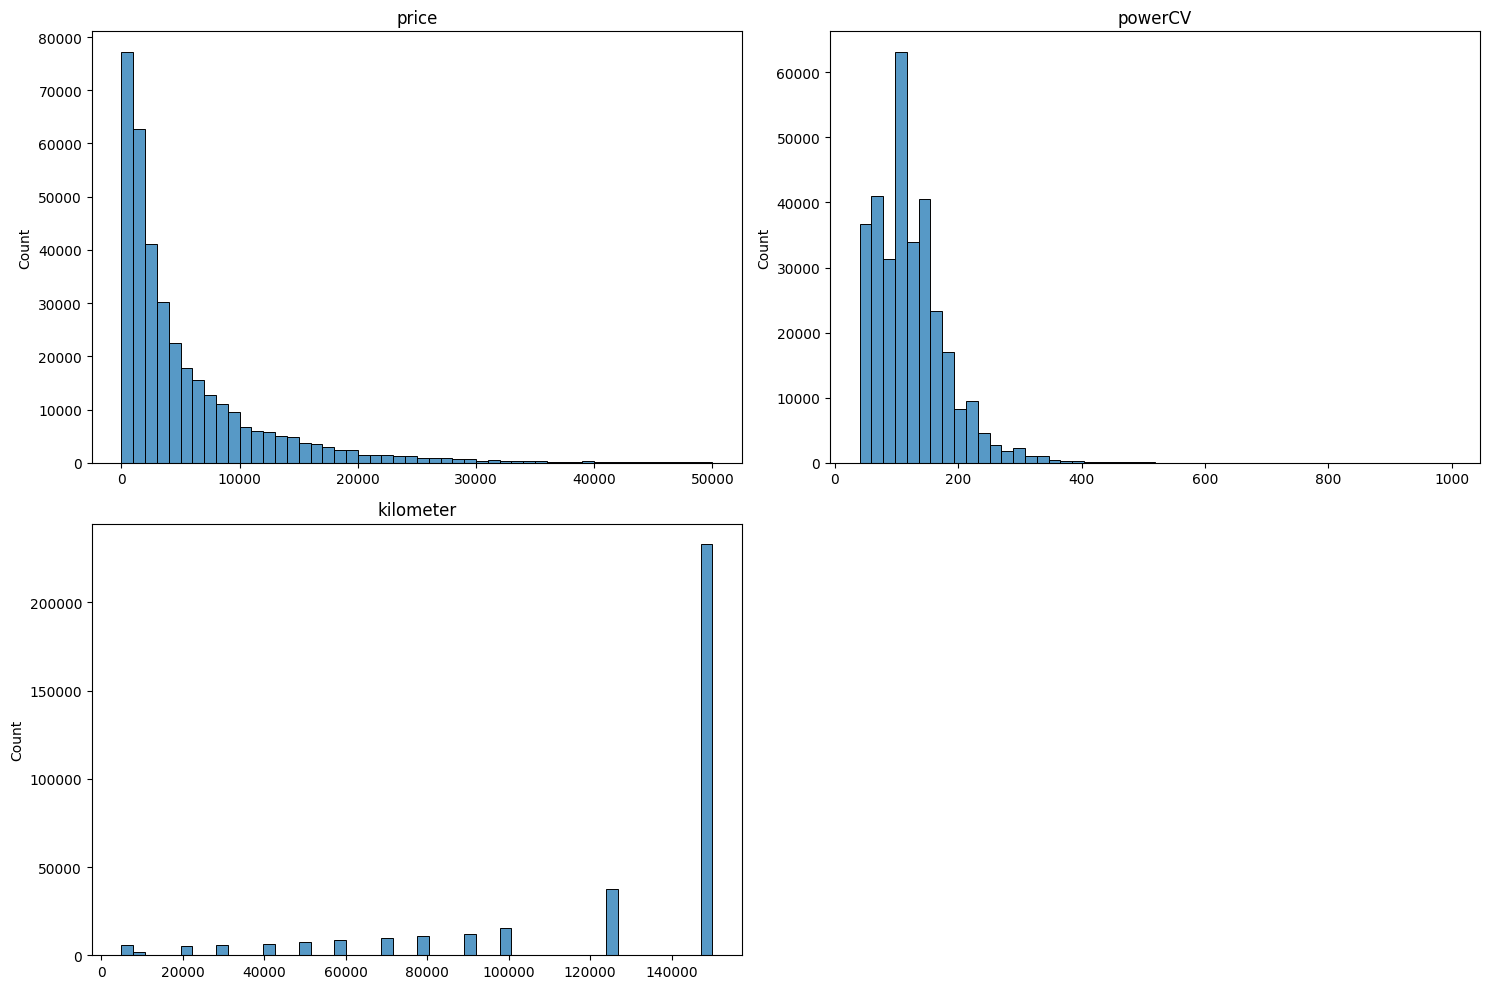

In [74]:
df_num, df_cat = fs.separar_df(df)
fs.plot_numericas(df_num)

- A pesar de gestionar los precios estos son muy dispersos, van desde casi 0 hasta 1 millon que hemos establecido por lo que la gráfica no es nada legible.
- En cuanto a los caballos si que se puede visualizar mejor pues hemos puesto a nan aquellos mayores de 2000. 
- En cuanto a los kilometros la mediana ya son 150000 al igual que el máximo lo que nos da que pensar ya que la mediana sea igual al máximo es bastante raro, puede ser que pongan ese valor como máximo aunque los coches tengan más kilometros.

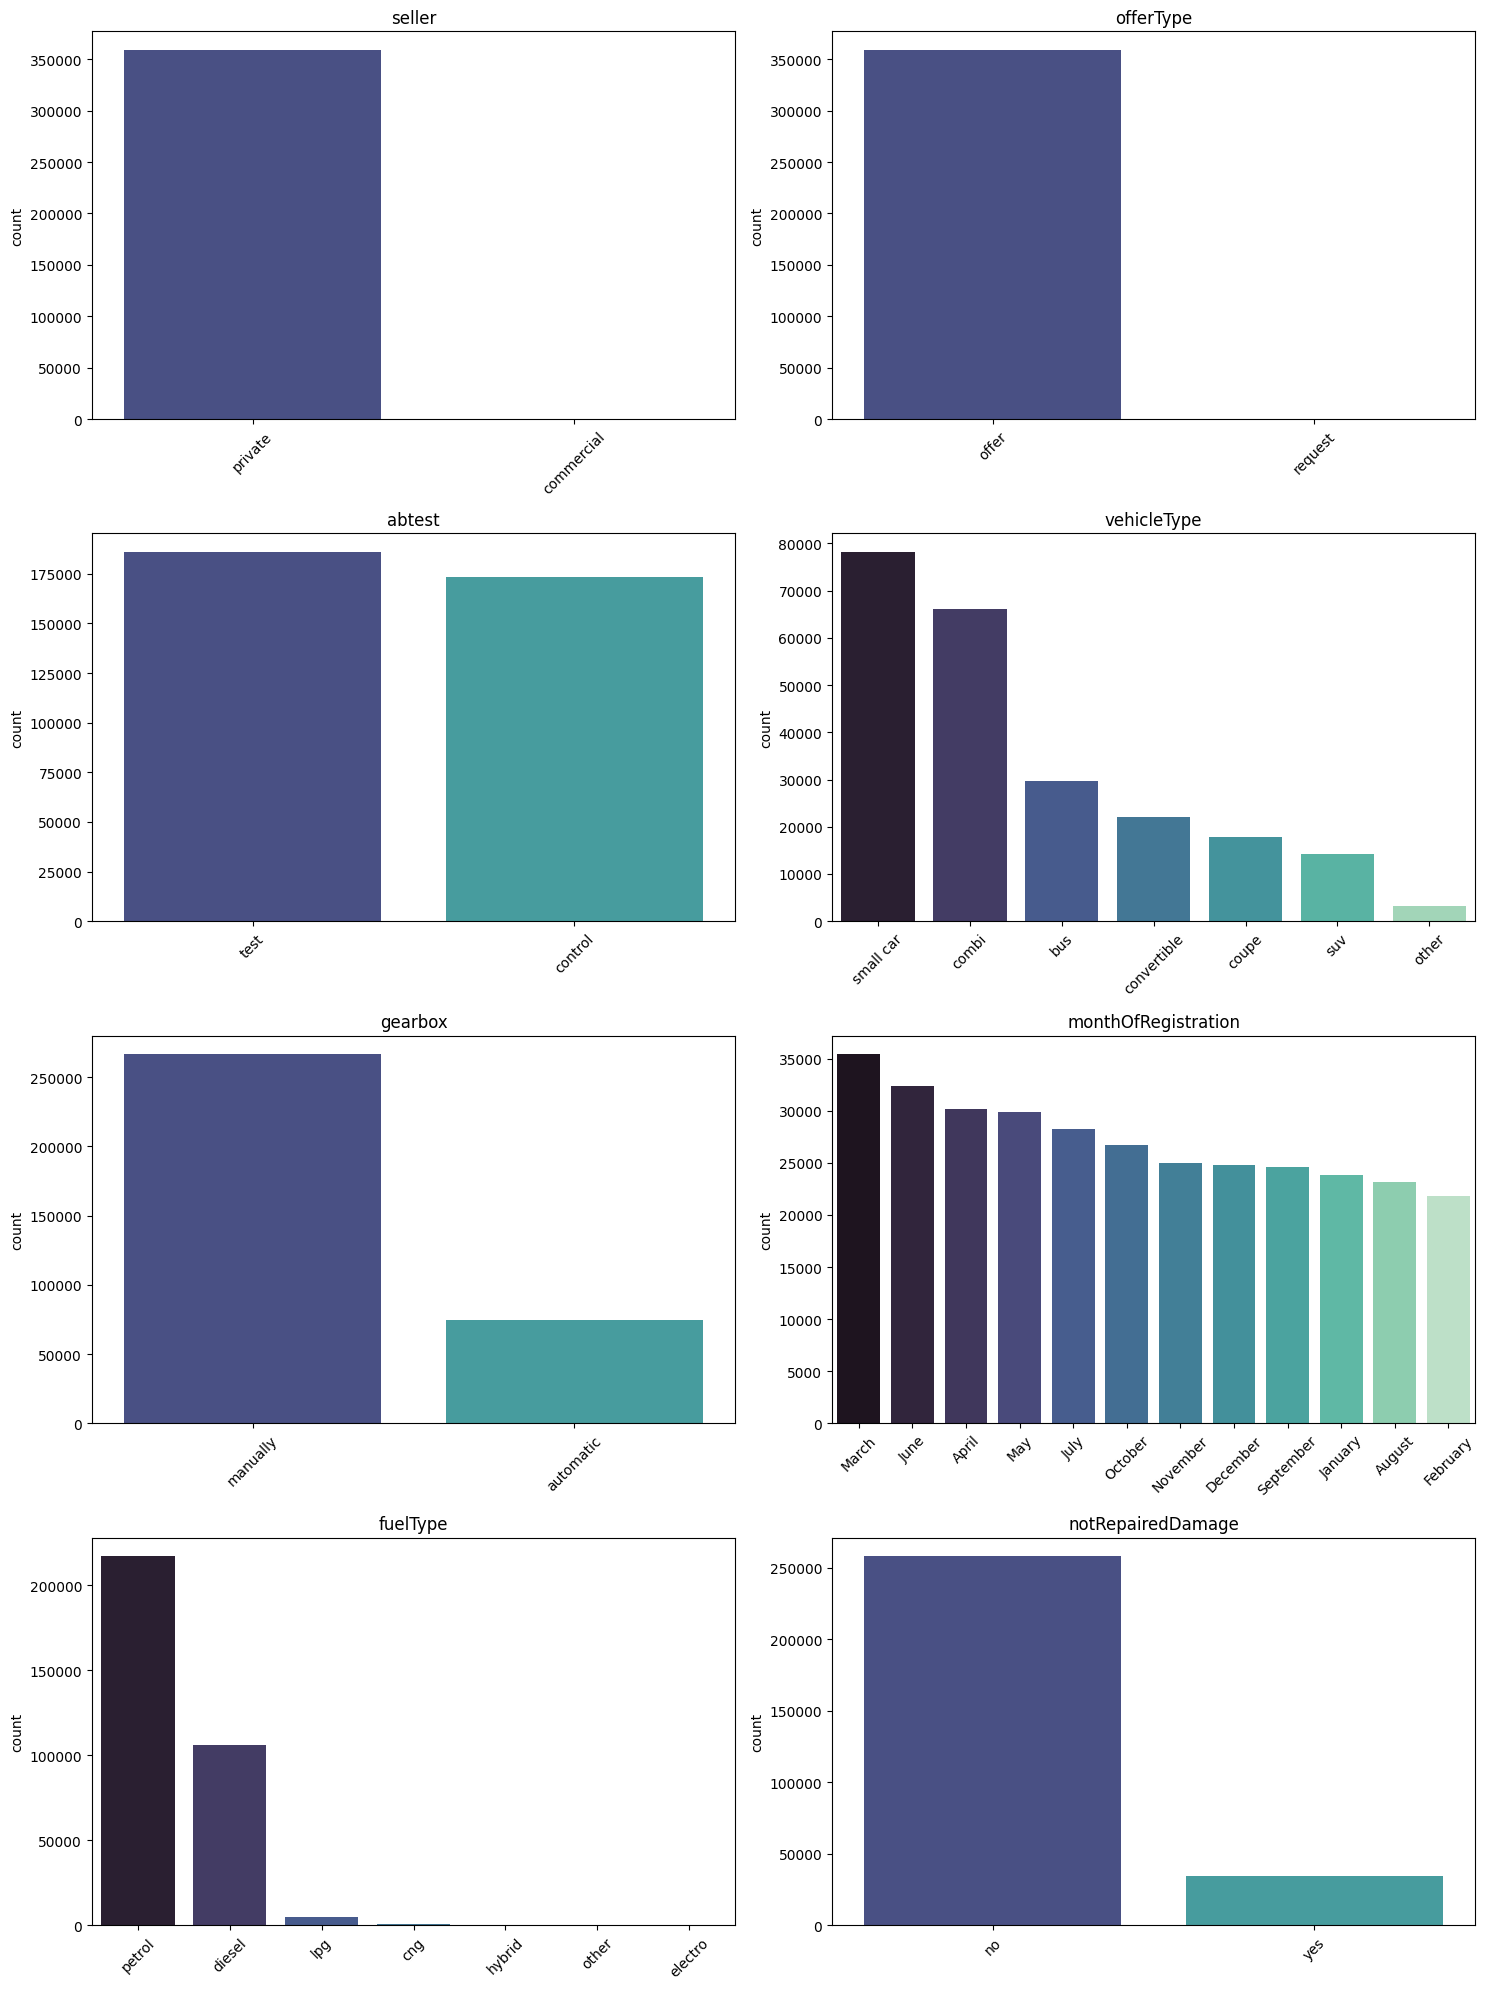

In [75]:
df_categoricas = df_cat[['seller', 'offerType', 'abtest', 'vehicleType',
        'gearbox', 'monthOfRegistration',
       'fuelType', 'notRepairedDamage']]
fs.plot_categoricas(df_categoricas)

En las gráficas podemos observar que la mayoría para vendedor es privado, para tipo de oferta es venta en vez de subasta y la mayoría de los coches no han sido reparados. Hay bastante más manuales que automáticos y la mayor parte de gasolina seguido de diesel. 

### 2. Visualizar la relación de las numéricas y categóricas con la variable respuesta.

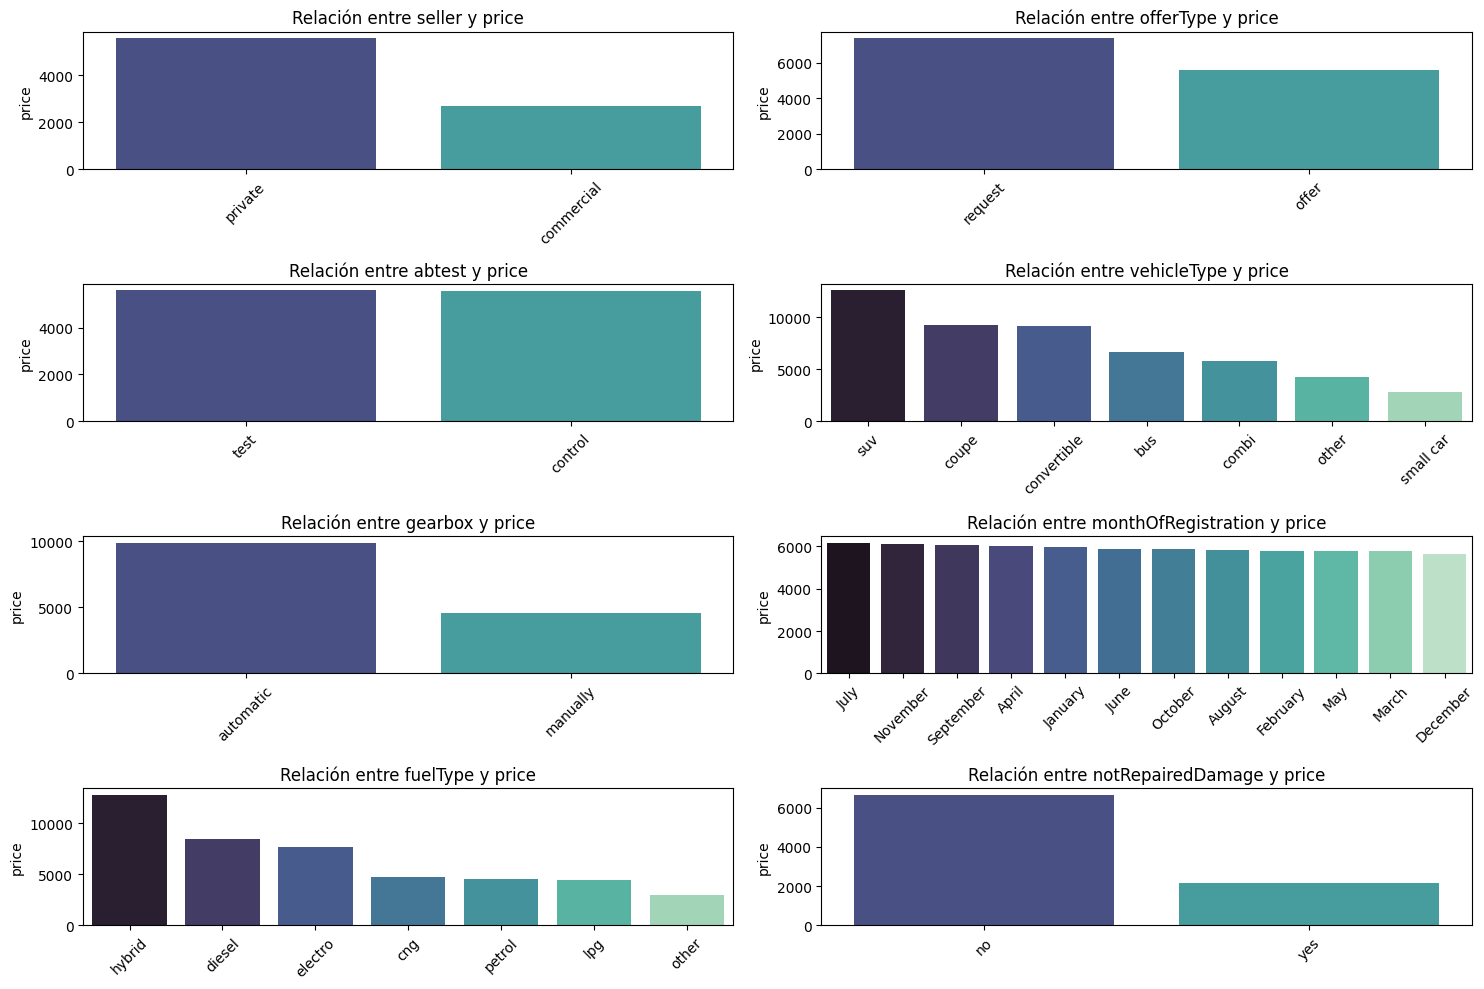

In [76]:
df_aux = df[['seller', 'offerType', 'abtest', 'vehicleType', 'gearbox',
       'monthOfRegistration', 'fuelType', 'notRepairedDamage', 'price']]

fs.relacion_vr_categoricas(df_aux, "price")

Podemos observar que el precio de los coches de los particulares son muy superioires a los del concesionario. En cuanto al tipo de oferta es ligeramente superioir si es subasta. En orden de precio para los vehículos tenemos liderando los suv y seguidos de los coupe y los convertibles. En cuanto al tipo de caja de cambios, los coches automáticos son mas caros que los manuales. Los coches eléctricos son más caros que los híbridos y los híbridos que los de diesel. Y finalmente los que no han sido reparados son más caros de media que los que sí lo han sido. Por lo que observando esta gráficas podemos confirmar que los datos actúan acorde a los previsto y no hay ninguna gráfica que nos sorprenda.

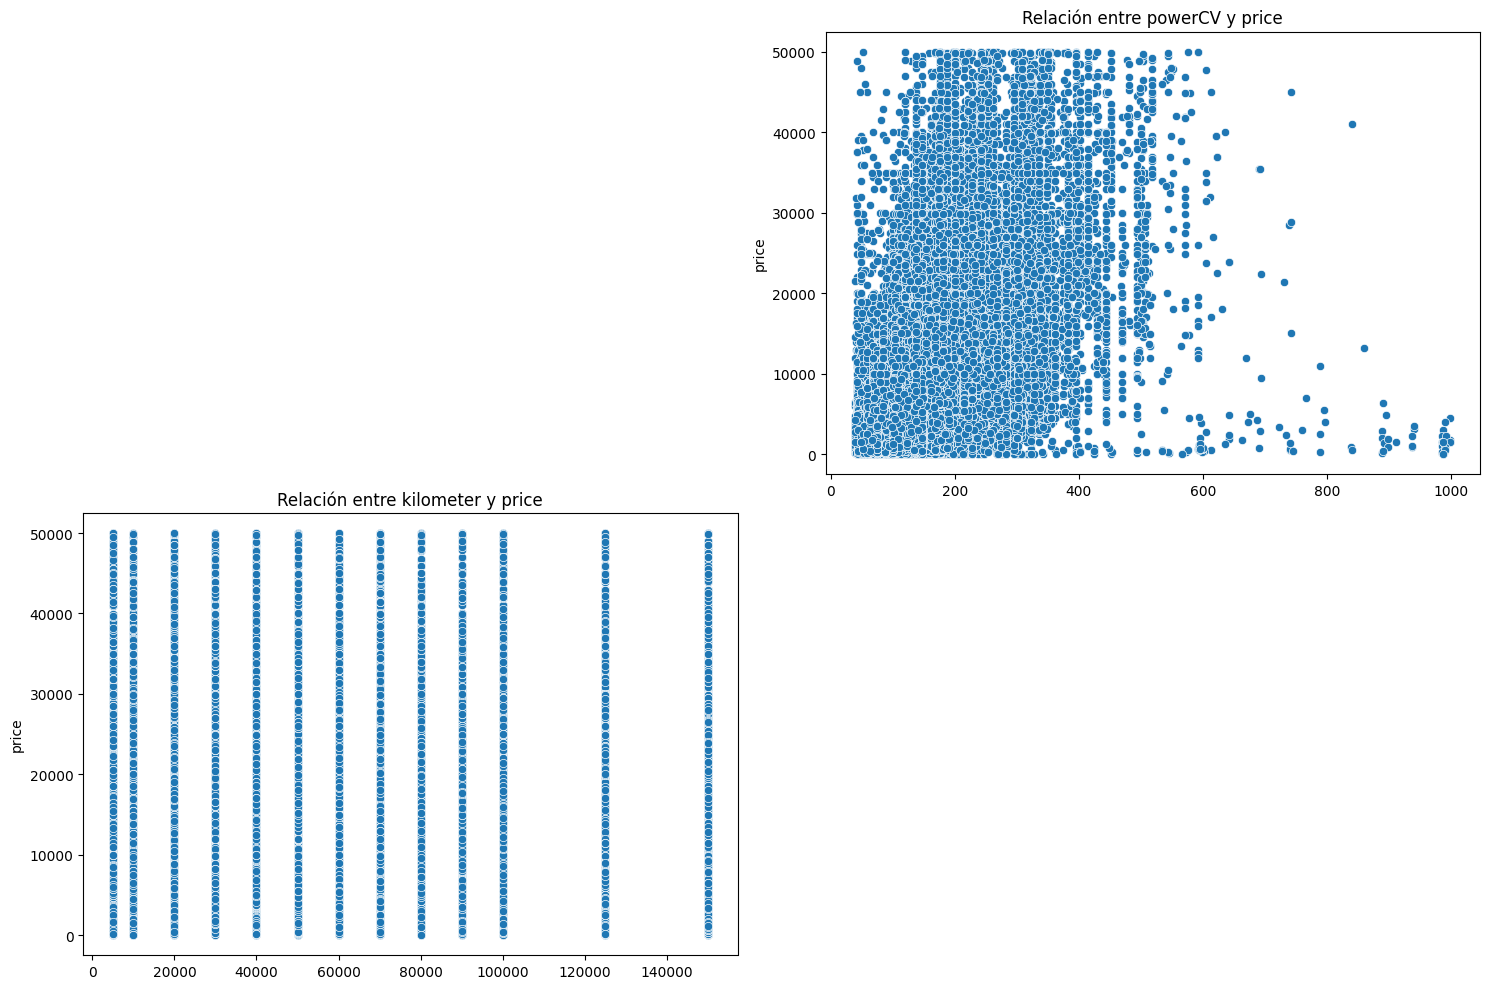

In [77]:
fs.relacion_vr_numericas(df, "price")

En la gráfica de los caballos empezamos a ver cosas más raras, como que motores de menos de 200 caballos cuesten más de medio millón o coches con más de 800 caballos con precios inferioires a 100000.Aunque la mayor parte de los coches independientemente de los caballos parecen ser inferioires a 200000 euros, por lo que a primera vesti parece no haber ningún tipo de correlación entre ambas variables.

En cuanto a los kilómetros a pesar de ser numérica se agrupa en la gráfica como una categórica ya que parece que han redondeado los valores de los kilómetros agrupándolos de 10mil en 10 mil. Tampoco parece haber ningún tipo de correlación entre kilómetros y precio.

### 3. Correlación entre variables numéricas

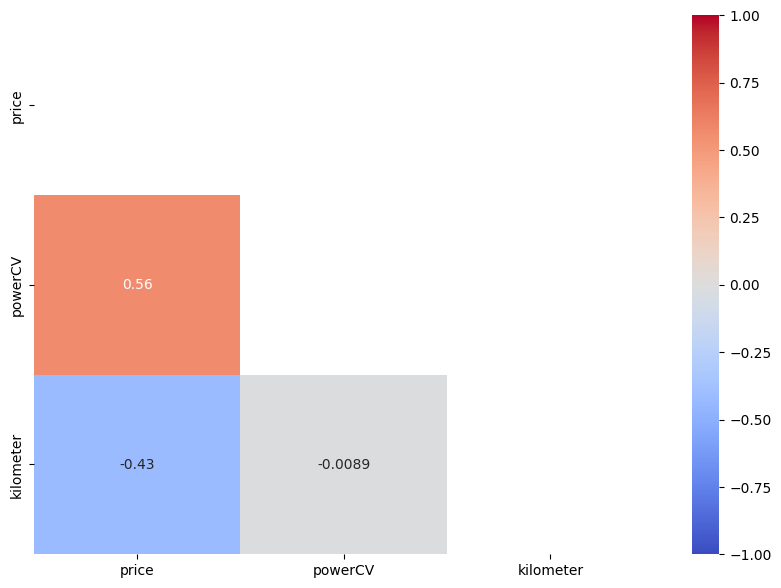

In [78]:
fs.heatmap_correlacion(df)

Como era de esperar ninguna de las correlaciones es lo suficientemente fuerte. Tiene sentido que precio y kilómetros se negativa ya que a más kilómetros menor precio, sin embargo un 0.28 es muy débil. Parecido para los caballos y precio, a más caballos más precio, sin embargo 0.44 sigue sin ser suficientemente fuerte.

### 4. Outliers

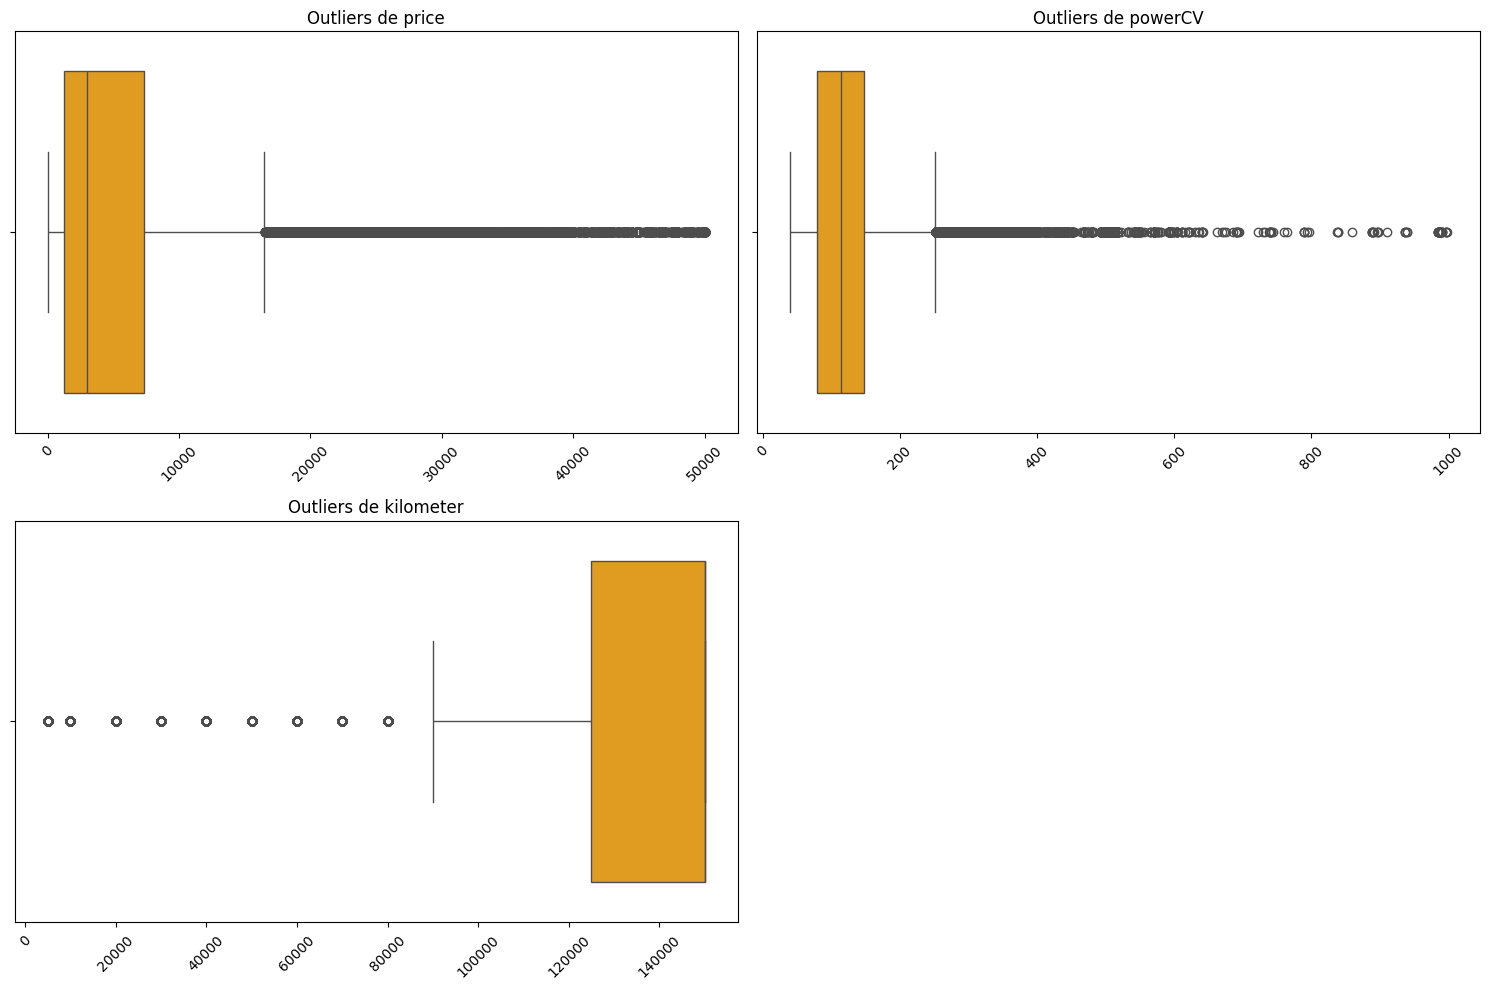

In [79]:
fs.detectar_outliers(df)

Como era de esperar para la variable de price tenemos muchísimos outliers que tendremos que gestionar más adelante. Para caballos como vimos también tras hacer el EDA hay muchos valores bastante grandes y a partir de 2000 los hemos cambiado por nulos. Y para kilómetros como podemos ver también hay algunos outliers aunque no tantos como para las otras variables.

### KNN Imputer

In [80]:
df_num = df.select_dtypes(include=np.number)
df_num_sin_precio = df_num[["powerCV", "kilometer"]]
df_num_sin_precio

,powerCV,kilometer
0,NaN,150000
1,187.0,125000
2,161.0,125000
3,74.0,150000
4,68.0,90000
...,...,...
359179,NaN,20000
359180,100.0,125000
359181,101.0,150000
359182,99.0,150000


In [81]:
imputer_knn = KNNImputer(n_neighbors=5)
knn_imputado = imputer_knn.fit_transform(df_num_sin_precio) #columnas que quiero que use para rellenar los vecinos
df_num_sin_nulos = pd.DataFrame(knn_imputado, columns=df_num_sin_precio.columns)

df_knn = df_num.copy()
df_knn[df_num_sin_nulos.columns]=df_num_sin_nulos
df_knn.isnull().sum()
df_knn.describe().T

,count,mean,std,min,25%,50%,75%,max
price,359184.0,5579.108791,6683.597445,1.0,1250.0,3000.0,7350.0,50000.0
powerCV,359184.0,122.853526,57.151440,40.0,86.0,108.6,148.0,998.0
kilometer,359184.0,125959.814468,39542.345895,5000.0,125000.0,150000.0,150000.0,150000.0


In [82]:
df_knn.to_csv("../datos/df_knn.csv")

### Iterative Imputer

In [83]:
imputer_iterative = IterativeImputer(estimator=RandomForestRegressor())
iterative_imputado = imputer_iterative.fit_transform(df_num_sin_precio) #columnas que quiero que use para rellenar los vecinos
df_num_sin_nulos_iterative = pd.DataFrame(iterative_imputado, columns=df_num_sin_precio.columns)

df_iterative = df.copy()
df_iterative[df_num_sin_nulos_iterative.columns]=df_num_sin_nulos_iterative
df_iterative.isnull().sum()
df_iterative.describe().T

,count,mean,std,min,25%,50%,75%,max
price,359184.0,5579.108791,6683.597445,1.0,1250.0,3000.0,7350.0,50000.0
powerCV,359184.0,124.043124,56.619404,40.0,87.0,120.0,148.0,998.0
kilometer,359184.0,125959.814468,39542.345895,5000.0,125000.0,150000.0,150000.0,150000.0


In [87]:
df_iterative.to_csv("../datos/df_iterative.csv")

Comparamos las tablas obtenidas a tarvés de los dos algoritmos con el describe del df orifinal.

In [88]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,359184.0,5579.108791,6683.597445,1.0,1250.0,3000.0,7350.0,50000.0
powerCV,320387.0,124.044374,59.946078,40.0,79.0,114.0,148.0,998.0
kilometer,359184.0,125959.814468,39542.345895,5000.0,125000.0,150000.0,150000.0,150000.0


Comparando ambos describe con el original podemos observar que para el RandomForest la media es más cercana a la original, las medianas están a la misma distancia de la original y la desviación es mejor la del iterative, por lo que elgimos el método iterative imputer.

In [92]:
df_iterative.isna().sum()

dateCrawled                 0
name                        0
seller                      0
offerType                   0
price                       0
abtest                      0
vehicleType            127737
gearbox                 17609
powerCV                     0
model                   18061
kilometer                   0
monthOfRegistration     33126
fuelType                29820
brand                       0
notRepairedDamage       66656
dateCreated                 0
postalCode                  0
lastSeen                    0
tipo_coche                  0
dtype: int64

### Gestión nulos categóricas

In [93]:
# Lista de las columnas categóricas con valores nulos
cols_categoricas_con_nulos = [
    "vehicleType", "gearbox", "model", "monthOfRegistration", 
    "fuelType", "notRepairedDamage"]

# Reemplazar los valores nulos en estas columnas por "sin informacion"
df_iterative[cols_categoricas_con_nulos] = df_iterative[cols_categoricas_con_nulos].fillna("sin informacion")

In [94]:
df_iterative.isna().sum()

dateCrawled            0
name                   0
seller                 0
offerType              0
price                  0
abtest                 0
vehicleType            0
gearbox                0
powerCV                0
model                  0
kilometer              0
monthOfRegistration    0
fuelType               0
brand                  0
notRepairedDamage      0
dateCreated            0
postalCode             0
lastSeen               0
tipo_coche             0
dtype: int64

In [95]:
df_iterative.to_csv("../datos/df_gestion_nulos.csv")